In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# make filepath to netflix2019.csv
df = pd.read_csv("C:/Users/harsh/Downloads/netflix_titles_nov_2019.csv/data/netflix2019.csv")

In [9]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


### Amount of shows compared to the amount of movies

<AxesSubplot:ylabel='type'>

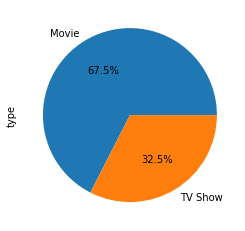

In [4]:
#amount of movies and tv shows
amount_of_shows = df['type'].value_counts()
amount_of_shows.plot(kind='pie', autopct='%1.1f%%')

### Number of shows and movies based on their ratings

<AxesSubplot:>

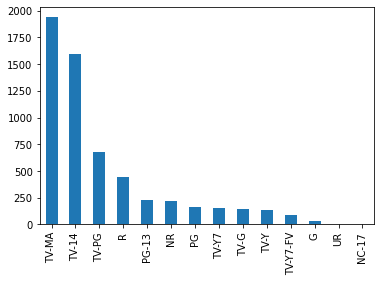

In [5]:
ratingstypes = df['rating'].value_counts()
ratingstypes.plot(kind='bar')

In [6]:
# ratingstypes.to_csv('ratingstypes.csv')

### How many movies and shows released per year

In [44]:
release_year = df['release_year'].value_counts()
release_year.sort_values(ascending=True).tail(15)

2005      52
2006      57
2007      61
2008     102
2009     106
2011     127
2010     137
2012     174
2013     232
2014     281
2015     502
2019     762
2016     818
2017     928
2018    1040
Name: release_year, dtype: int64

In [45]:
release_year.sort_values(ascending=True).tail(10).to_csv('release_year.csv')

In [35]:
shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [47]:
movies_release = movies['release_year'].value_counts()
x = movies_release.sort_values(ascending=True).tail(10)
x.to_csv('movies_release.csv')

In [48]:
shows_release = shows['release_year'].value_counts()
x = shows_release.sort_values(ascending=True).tail(10)
x.to_csv('shows_release.csv')

### Number of shows and movies per country

In [10]:
df['country'] = df['country'].replace(np.nan, 'Unknown')

In [11]:
country_codes = {
    'afghanistan': 'AFG',
    'albania': 'ALB',
    'algeria': 'DZA',
    'american samoa': 'ASM',
    'andorra': 'AND',
    'angola': 'AGO',
    'anguilla': 'AIA',
    'antigua and barbuda': 'ATG',
    'argentina': 'ARG',
    'armenia': 'ARM',
    'aruba': 'ABW',
    'australia': 'AUS',
    'austria': 'AUT',
    'azerbaijan': 'AZE',
    'bahamas': 'BHM',
    'bahrain': 'BHR',
    'bangladesh': 'BGD',
    'barbados': 'BRB',
    'belarus': 'BLR',
    'belgium': 'BEL',
    'belize': 'BLZ',
    'benin': 'BEN',
    'bermuda': 'BMU',
    'bhutan': 'BTN',
    'bolivia': 'BOL',
    'bosnia and herzegovina': 'BIH',
    'botswana': 'BWA',
    'brazil': 'BRA',
    'british virgin islands': 'VGB',
    'brunei': 'BRN',
    'bulgaria': 'BGR',
    'burkina faso': 'BFA',
    'burma': 'MMR',
    'burundi': 'BDI',
    'cabo verde': 'CPV',
    'cambodia': 'KHM',
    'cameroon': 'CMR',
    'canada': 'CAN',
    'cayman islands': 'CYM',
    'central african republic': 'CAF',
    'chad': 'TCD',
    'chile': 'CHL',
    'china': 'CHN',
    'colombia': 'COL',
    'comoros': 'COM',
    'congo democratic': 'COD',
    'Congo republic': 'COG',
    'cook islands': 'COK',
    'costa rica': 'CRI',
    "cote d'ivoire": 'CIV',
    'croatia': 'HRV',
    'cuba': 'CUB',
    'curacao': 'CUW',
    'cyprus': 'CYP',
    'czech republic': 'CZE',
    'denmark': 'DNK',
    'djibouti': 'DJI',
    'dominica': 'DMA',
    'dominican republic': 'DOM',
    'ecuador': 'ECU',
    'egypt': 'EGY',
    'el salvador': 'SLV',
    'equatorial guinea': 'GNQ',
    'eritrea': 'ERI',
    'estonia': 'EST',
    'ethiopia': 'ETH',
    'falkland islands': 'FLK',
    'faroe islands': 'FRO',
    'fiji': 'FJI',
    'finland': 'FIN',
    'france': 'FRA',
    'french polynesia': 'PYF',
    'gabon': 'GAB',
    'gambia, the': 'GMB',
    'georgia': 'GEO',
    'germany': 'DEU',
    'ghana': 'GHA',
    'gibraltar': 'GIB',
    'greece': 'GRC',
    'greenland': 'GRL',
    'grenada': 'GRD',
    'guam': 'GUM',
    'guatemala': 'GTM',
    'guernsey': 'GGY',
    'guinea-bissau': 'GNB',
    'guinea': 'GIN',
    'guyana': 'GUY',
    'haiti': 'HTI',
    'honduras': 'HND',
    'hong kong': 'HKG',
    'hungary': 'HUN',
    'iceland': 'ISL',
    'india': 'IND',
    'indonesia': 'IDN',
    'iran': 'IRN',
    'iraq': 'IRQ',
    'ireland': 'IRL',
    'isle of man': 'IMN',
    'israel': 'ISR',
    'italy': 'ITA',
    'jamaica': 'JAM',
    'japan': 'JPN',
    'jersey': 'JEY',
    'jordan': 'JOR',
    'kazakhstan': 'KAZ',
    'kenya': 'KEN',
    'kiribati': 'KIR',
    'north korea': 'PRK',
    'south korea': 'KOR',
    'kosovo': 'KSV',
    'kuwait': 'KWT',
    'kyrgyzstan': 'KGZ',
    'laos': 'LAO',
    'latvia': 'LVA',
    'lebanon': 'LBN',
    'lesotho': 'LSO',
    'liberia': 'LBR',
    'libya': 'LBY',
    'liechtenstein': 'LIE',
    'lithuania': 'LTU',
    'luxembourg': 'LUX',
    'macau': 'MAC',
    'macedonia': 'MKD',
    'madagascar': 'MDG',
    'malawi': 'MWI',
    'malaysia': 'MYS',
    'maldives': 'MDV',
    'mali': 'MLI',
    'malta': 'MLT',
    'marshall islands': 'MHL',
    'mauritania': 'MRT',
    'mauritius': 'MUS',
    'mexico': 'MEX',
    'micronesia': 'FSM',
    'moldova': 'MDA',
    'monaco': 'MCO',
    'mongolia': 'MNG',
    'montenegro': 'MNE',
    'morocco': 'MAR',
    'mozambique': 'MOZ',
    'namibia': 'NAM',
    'nepal': 'NPL',
    'netherlands': 'NLD',
    'new caledonia': 'NCL',
    'new zealand': 'NZL',
    'nicaragua': 'NIC',
    'nigeria': 'NGA',
    'niger': 'NER',
    'niue': 'NIU',
    'northern mariana islands': 'MNP',
    'norway': 'NOR',
    'oman': 'OMN',
    'pakistan': 'PAK',
    'palau': 'PLW',
    'panama': 'PAN',
    'papua new guinea': 'PNG',
    'paraguay': 'PRY',
    'peru': 'PER',
    'philippines': 'PHL',
    'poland': 'POL',
    'portugal': 'PRT',
    'puerto rico': 'PRI',
    'qatar': 'QAT',
    'romania': 'ROU',
    'russia': 'RUS',
    'rwanda': 'RWA',
    'saint kitts and nevis': 'KNA',
    'saint lucia': 'LCA',
    'saint martin': 'MAF',
    'saint pierre and miquelon': 'SPM',
    'saint vincent and the grenadines': 'VCT',
    'samoa': 'WSM',
    'san marino': 'SMR',
    'sao tome and principe': 'STP',
    'saudi arabia': 'SAU',
    'senegal': 'SEN',
    'serbia': 'SRB',
    'seychelles': 'SYC',
    'sierra leone': 'SLE',
    'singapore': 'SGP',
    'sint maarten': 'SXM',
    'slovakia': 'SVK',
    'slovenia': 'SVN',
    'solomon islands': 'SLB',
    'somalia': 'SOM',
    'south africa': 'ZAF',
    'south sudan': 'SSD',
    'spain': 'ESP',
    'sri lanka': 'LKA',
    'sudan': 'SDN',
    'suriname': 'SUR',
    'swaziland': 'SWZ',
    'sweden': 'SWE',
    'switzerland': 'CHE',
    'syria': 'SYR',
    'taiwan': 'TWN',
    'tajikistan': 'TJK',
    'tanzania': 'TZA',
    'thailand': 'THA',
    'timor-leste': 'TLS',
    'togo': 'TGO',
    'tonga': 'TON',
    'trinidad and tobago': 'TTO',
    'tunisia': 'TUN',
    'turkey': 'TUR',
    'turkmenistan': 'TKM',
    'tuvalu': 'TUV',
    'uganda': 'UGA',
    'ukraine': 'UKR',
    'united arab emirates': 'ARE',
    'united kingdom': 'GBR',
    'united states': 'USA',
    'uruguay': 'URY',
    'uzbekistan': 'UZB',
    'vanuatu': 'VUT',
    'venezuela': 'VEN',
    'vietnam': 'VNM',
    'virgin islands': 'VGB',
    'west bank': 'WBG',
    'yemen': 'YEM',
    'zambia': 'ZMB',
    'zimbabwe': 'ZWE'
}

In [12]:
from collections import Counter
country_with_code, country = {}, {}
shows_countries = ", ".join(df['country'].dropna()).split(", ")
for c,v in dict(Counter(shows_countries)).items():
    code = ""
    if c.lower() in country_codes:
        code = country_codes[c.lower()]
    country_with_code[code] = v
    country[c] = v

In [13]:
countries = pd.DataFrame.from_dict(country, orient='index')
countries.sort_values(by=0, ascending=False, inplace=True)

In [14]:
# countries.to_csv("countries.csv")

### Number of shows in accordance to the amount of seasons that they have

In [15]:
seasons = shows.groupby(['duration']).count().reset_index()
seasons = seasons[['duration', 'show_id']].sort_values(by=['show_id'], ascending=False)
# seasons.to_csv("seasons.csv")

### Finding out the most popular genres

In [16]:
col = "listed_in"
categories = ", ".join(df['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

In [17]:
labels = pd.DataFrame(labels)
values = pd.DataFrame(values)

In [18]:
genres = pd.concat([labels, values], axis=1)

In [19]:
cols = ['genre', 'count']
genres.columns = cols

In [20]:
genres.set_index('genre', inplace=True)

In [21]:
genres.sort_values(by=['count'], ascending=False, inplace=True)

In [22]:
genres.head(10).to_csv("top10genres.csv")

### Stand Up Comedies 

In [23]:
tag = "Stand-Up Comedy"
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
small = df[df["relevant"] == 1]
# small[small["country"] == "United States"][["title", "country","release_year"]]
standup_by_country = small['country'].value_counts()
# stand up comedies by release year
standup_by_year = small['release_year'].value_counts()
standup_by_year = standup_by_year.sort_index(ascending=False)
standup_by_year.head(10)

2019    52
2018    73
2017    66
2016    38
2015    19
2014    10
2013     9
2012    12
2011     6
2010     3
Name: release_year, dtype: int64

In [24]:
standup_by_country.to_csv("standup_by_country.csv")
standup_by_year.head(10).to_csv("standup_by_year.csv")